#SPAM TEXT CLASSIFICATION

Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load Dataset

In [52]:
df=pd.read_csv('/content/spam.tsv', sep = '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [53]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [54]:
df.shape

(5572, 4)

In [55]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Balance Dataset

In [56]:
ham=df[df['label']=='ham']
ham.head(10)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
10,ham,I'm gonna be home soon and i don't want to tal...,109,6
13,ham,I've been searching for the right words to tha...,196,4
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,35,2
16,ham,Oh k...i'm watching here:),26,6


In [57]:
spam=df[df['label']=='spam']
spam.head(10)

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
12,spam,URGENT! You have won a 1 week FREE membership ...,155,8
15,spam,"XXXMobileMovieClub: To use your credit, click ...",149,11
19,spam,England v Macedonia - dont miss the goals/team...,155,8
34,spam,Thanks for your subscription to Ringtone UK yo...,158,2
42,spam,07732584351 - Rodger Burns - MSG = We tried to...,172,5


In [58]:
spam.shape, ham.shape

((747, 4), (4825, 4))

Dataset is inbalanced. So, we need to balance whole dataset

In [59]:
ham=ham.sample(spam.shape[0])
spam.shape, ham.shape

((747, 4), (747, 4))

In [60]:
data = pd.concat([spam,ham],ignore_index=True)
data.shape

(1494, 4)

In [61]:
data['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

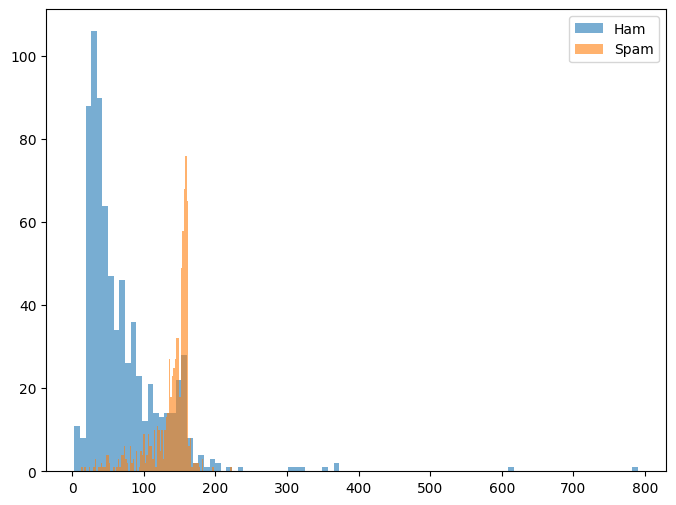

In [62]:
plt.figure(figsize=(8,6))
plt.hist(ham['length'], bins=100, alpha=0.6, label='Ham')
plt.hist(spam['length'], bins=100, alpha=0.6, label='Spam')
plt.legend()
plt.show()

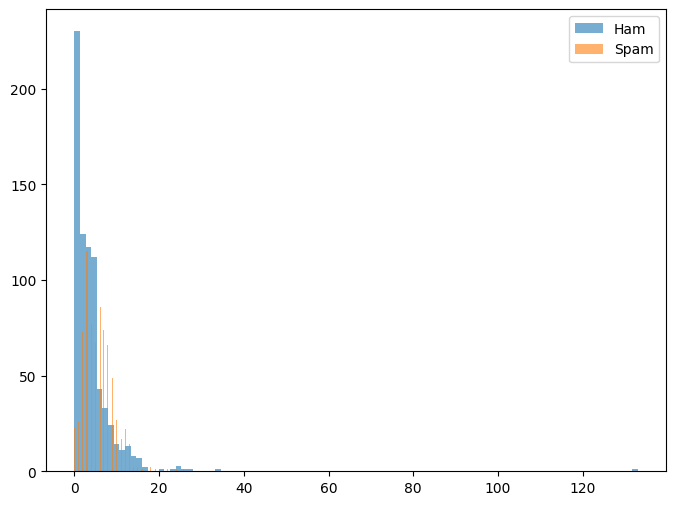

In [63]:
plt.figure(figsize=(8,6))
plt.hist(ham['punct'], bins=100, alpha=0.6, label='Ham')
plt.hist(spam['punct'], bins=100, alpha=0.6, label='Spam')
plt.legend()
plt.show()

###Data Preparation

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [65]:
data.head(10)

,label,message,length,punct
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
1,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
2,spam,WINNER!! As a valued network customer you have...,157,6
3,spam,Had your mobile 11 months or more? U R entitle...,154,2
4,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
5,spam,URGENT! You have won a 1 week FREE membership ...,155,8
6,spam,"XXXMobileMovieClub: To use your credit, click ...",149,11
7,spam,England v Macedonia - dont miss the goals/team...,155,8
8,spam,Thanks for your subscription to Ringtone UK yo...,158,2
9,spam,07732584351 - Rodger Burns - MSG = We tried to...,172,5


In [66]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['message'])


In [67]:
X=X.toarray()

In [68]:
X.shape

(1494, 4582)

In [69]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size = 0.2, random_state = 21, stratify = data['label'])

In [71]:
X_train.shape, X_test.shape

((1195, 4582), (299, 4582))

##Training Text Classifier

##SVM

In [72]:
clf=SVC(C=1000, degree=3, gamma='auto')

In [73]:
clf.fit(X_train, y_train)

SVC(C=1000, gamma='auto')

In [74]:
y_pred=clf.predict(X_test)

In [75]:
confusion_matrix(y_test, y_pred)

array([[148,   1],
       [  9, 141]])

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.94      0.99      0.97       149
        spam       0.99      0.94      0.97       150

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299



## Random Forest Classifier

In [77]:
clf = RandomForestClassifier(n_estimators=100, n_jobs= -1)

In [78]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [79]:
y_pred=clf.predict(X_test)

In [80]:
confusion_matrix(y_test, y_pred)

array([[149,   0],
       [ 11, 139]])

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       149
        spam       1.00      0.93      0.96       150

    accuracy                           0.96       299
   macro avg       0.97      0.96      0.96       299
weighted avg       0.97      0.96      0.96       299



## Testing model

In [82]:
def predict(x):
    x = tfidf.transform([x])
    x = x.toarray()
    pred = clf.predict(x)
    return pred

In [83]:
predict('good morning, whassup')

array(['ham'], dtype=object)

In [84]:
predict("Congratulations! You have been selected as the lucky winner of our exclusive prize giveaway. You've won a brand new iPhone 12, a luxury vacation package to a tropical paradise, and $1000 in cash!")

array(['spam'], dtype=object)

In [85]:
import joblib

In [86]:
# Save the predict function and the classifier to a file
joblib.dump(predict, 'predict_function.pkl')
joblib.dump(clf, 'classifier_model.pkl')

['classifier_model.pkl']